In [1]:
%reload_ext autoreload
%autoreload 2
# %matplotlib qt

from time import time
from tqdm import tqdm
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from redcell.utils import get_s2p_data, get_s2p_redcell, surround_filter, split_planes
from redcell.red_cell_processor import RedCellProcessor
from redcell.features import in_vs_out, phase_correlation_zero, dot_product, compute_correlation, dot_product_array
from redcell.filters import filter
from redcell.gui import RedSelectionGUI

In [2]:
# Gather suite2p data
s2p_dir = Path(r"C:\Users\Andrew\Documents\localData\ATL027\2023-07-28\701\suite2p")
stats, references = get_s2p_data(s2p_dir)
red_s2p = get_s2p_redcell(s2p_dir)

# Create a redcell processing object
rcp = RedCellProcessor(stats, references, red_s2p=red_s2p)
# centered_references = rcp.centered_references
# centered_masks = rcp.centered_masks
mask_volume = rcp.mask_volume
# filtered_references = rcp.filtered_centered_references

# Next step: 
# 1. GUI Time!!!
# 2. Visualization methods for optimizing the hyperparameters for preprocessing
# 3. Implement an optimization method for phase_corr_eps? 
#    - Might just be as simple as the user inputing the maximum size ROI, and then measuring
#      the average power for higher frequencies...

In [4]:
gui = RedSelectionGUI(rc)

red_s2p <class 'list'>


TypeError: only integer scalar arrays can be converted to a scalar index

In [22]:
features = dict(hello="world", mynameis="andrew")
print(features)

names = ["firststring", *features.keys()]
print(names)


{'hello': 'world', 'mynameis': 'andrew'}
['firststring', 'hello', 'mynameis']


0.13022160530090332
0.10612750053405762
False
7 16222 0.0004315127604487733


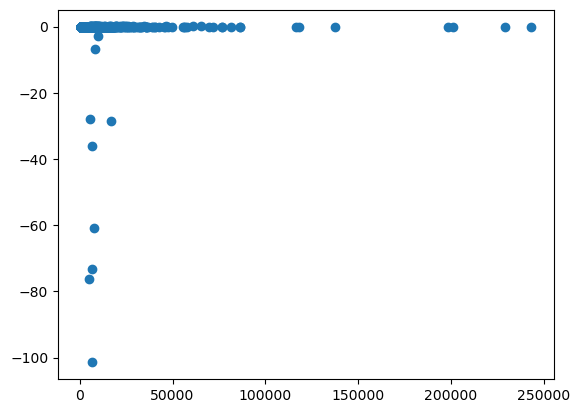

In [112]:
t = time()
dp = dot_product(rc.lam, rc.ypix, rc.xpix, rc.plane_idx, rc.references)
print(time() - t)

t = time()
dpa = dot_product_array(centered_masks, centered_references)
print(time() - t)

print(np.allclose(dp, dpa))

idx_diff = np.abs(dp - dpa) > 20
print(np.sum(idx_diff), len(idx_diff), np.sum(idx_diff) / len(idx_diff))

plt.scatter(dp, dpa-dp)
plt.show()

In [101]:
t = time()
masks_surround, references_surround = surround_filter(centered_masks, centered_references)
print(time() - t)

t = time()
feature_io = in_vs_out(centered_references, centered_references)
print(time() - t)

t = time()
feature_pc = phase_correlation_zero(centered_references, centered_references)
print(time() - t)

t = time()
feature_cc = compute_correlation(masks_surround, references_surround)
print(time() - t)


0.19421648979187012
0.11198067665100098
1.6059231758117676
0.31749439239501953


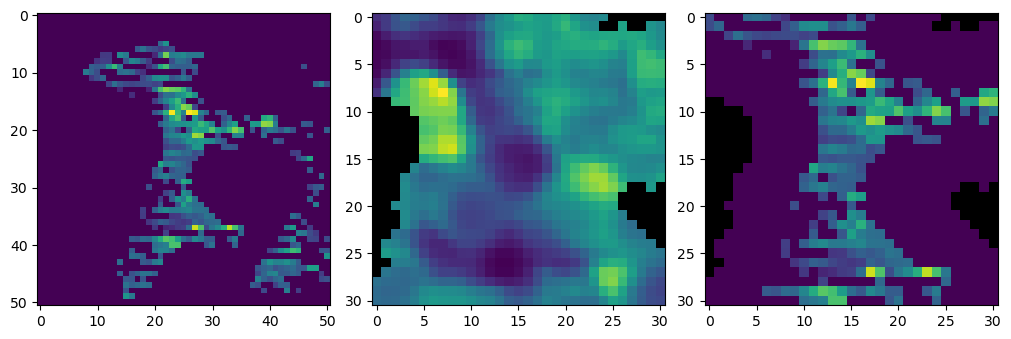

In [119]:
# Test dilation
iroi = 10
iroi = np.nonzero(idx_diff)[0][5]


cmap = mpl.colormaps["viridis"]
cmap.set_bad(color="black")

fig, ax = plt.subplots(1, 3, figsize=(10, 5), layout="constrained")
ax[0].imshow(centered_masks[iroi], cmap=cmap)
ax[1].imshow(references_surround[iroi], cmap=cmap)
ax[2].imshow(masks_surround[iroi], cmap=cmap)
# ax[3].imshow(cmasks[iroi], cmap=cmap)
plt.show()